## OBJECTIVE INSIGHT:

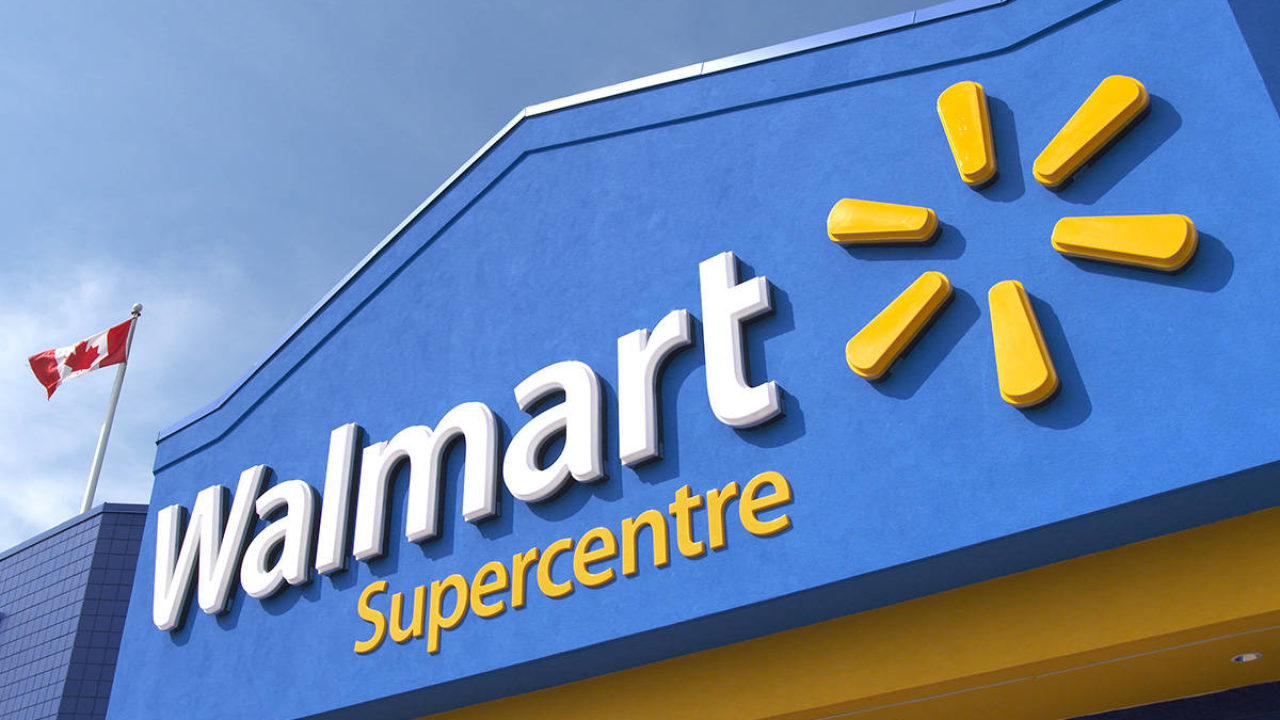

In [1]:
from IPython import display
display.Image('https://raw.githubusercontent.com/Masterx-AI/Project_Retail_Analysis_with_Walmart/main/Wallmart1.jpg')

_Walmart, one of the top retailers in the US, would like to make accurate sales and demand predictions. Each day, specific occasions and holidays have an impact on sales. Data on sales are available for 45 Walmart locations. Unforeseen demand is a hurdle for the company, and occasionally stock runs out because of a bad machine learning system. A perfect machine learning algorithm will precisely estimate demand and take into account variables like the CPI, unemployment rate, and other economic indicators._

_Every year, Walmart holds a number of promotional discount sales. The Super Bowl, Labour Day, Thanksgiving, and Christmas are the four biggest holidays that are preceded by these markdowns. In comparison to non-holiday weeks, the evaluation of the weeks that include certain holidays is weighted five times more heavily. Modelling the effects of markdowns on these holiday periods in the absence of complete/ideal historical data is one of the challenges provided by this competition. For 45 Walmart locations spread across several geographies, historical sales information is available._

__GOAL__: _A retail store that has multiple outlets across the country are facing issues in managing the inventory to match the demand with respect to supply. You are a data scientist, who has to
come up with useful insights using the data and make prediction models to forecast the sales for
X number of months/years._


## IMPORTING THE DEPENDENCIES:

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [3]:
df = pd.read_csv('C:/Users/Administrator/Downloads/Walmart.csv')

## PRIMARY DATA EXPLORATION:

In [4]:
df.head(3)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106


In [5]:
df.nunique().sort_values()

Holiday_Flag       2
Store             45
Date             143
Unemployment     349
Fuel_Price       892
CPI             2145
Temperature     3528
Weekly_Sales    6435
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [7]:
df.isnull().sum().sum()

0

In [8]:
df.duplicated().sum()

0

In [9]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


<font color = "orange"> __: :</br>
data has information about 45 stores.</br>
data has 8 columns and 6435 entries.</br>data has no nulls or duplicated values__
</font>

## EDA:

In [10]:
df['Date']=pd.to_datetime(df['Date'])

C:\Users\Administrator\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '19-02-2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\Administrator\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '26-02-2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\Administrator\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '19-03-2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\Administrator\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '26-03-2010' in DD/MM/YYYY 

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


### I. How do holidays affect sales:

In [12]:
 df['Holiday_Flag'].value_counts()

0    5985
1     450
Name: Holiday_Flag, dtype: int64

<font color = "orange"> __: :</br>
data contains 450 holidays and 5985 working days.</br>__
</font>

In [13]:
df.groupby('Holiday_Flag')['Weekly_Sales'].mean()

Holiday_Flag
0    1.041256e+06
1    1.122888e+06
Name: Weekly_Sales, dtype: float64

Text(0, 0.5, 'Weekly Sales')

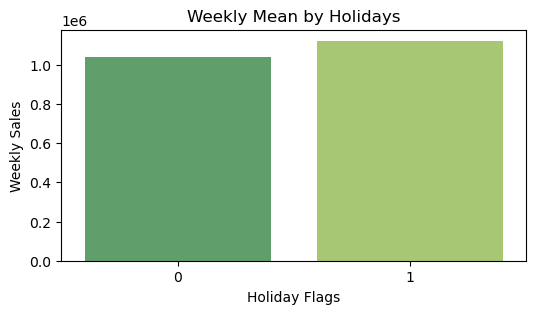

In [14]:
mean=df.groupby('Holiday_Flag')['Weekly_Sales'].mean().sort_values(ascending=False)

plt.figure(figsize=(6,3))
sns.barplot(x=mean.index, y=mean.values,palette='summer')
plt.title('Weekly Mean by Holidays')
plt.xlabel('Holiday Flags')
plt.ylabel('Weekly Sales')

<font color = "orange"> __: :</br>
The average weekly sales on working days amounts to 1041256.</br>
The average weekly sales on holidays amounts to 1122888.</br>
Sales are slightly higher on weeks with holidays__
</font>

### II. How does temperature affect sales:

In [15]:
#Average Temperature
df['Temperature'].mean()

60.66378243978229

In [16]:
low=df[(df['Temperature']>0) & (df['Temperature']<=20)]
l_sales=low['Weekly_Sales'].sum()

high=df[(df['Temperature']>61)]
h_sales=high['Weekly_Sales'].sum()

avg=df[(df['Temperature']>20) & (df['Temperature']<=61)]
a_sales=avg['Weekly_Sales'].sum()

l=[l_sales,h_sales,a_sales]
label=['0-20','21-60','61-100']

Text(0, 0.5, 'Weekly Sales')

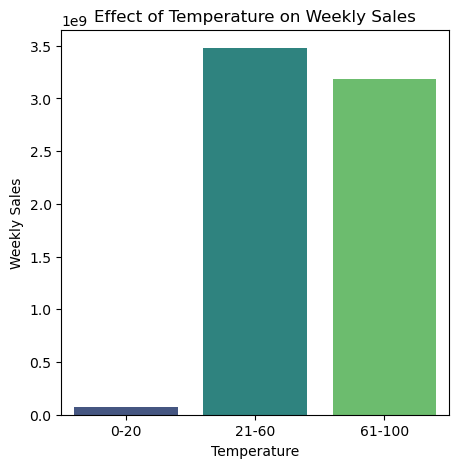

In [17]:
plt.figure(figsize=(5,5))
sns.barplot(x=label, y=l,palette='viridis') 
plt.title('Effect of Temperature on Weekly Sales')
plt.xlabel('Temperature')
plt.ylabel('Weekly Sales')

<font color = "orange"> __: :</br>
Sales are maximum when the temperature is moderate (20-60 Fahrenheit)__

### III. How does cost of fuel price affect sales:

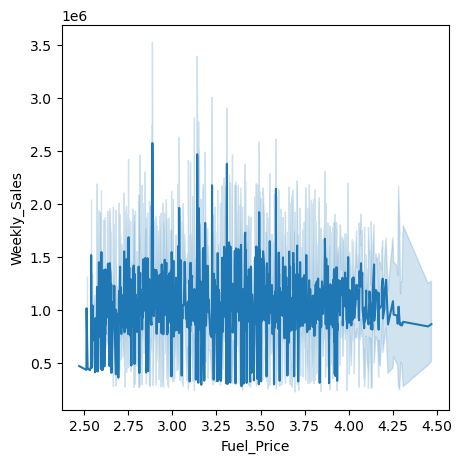

In [18]:
plt.figure(figsize=(5,5))
sns.lineplot(x='Fuel_Price', y='Weekly_Sales', data=df)
plt.show()

In [19]:
minfuel=df[df['Fuel_Price']==df['Fuel_Price'].min()]['Weekly_Sales'].values
maxfuel=df[df['Fuel_Price']==df['Fuel_Price'].max()]['Weekly_Sales'].values
f=[minfuel[0],maxfuel[0]]
price=[df['Fuel_Price'].min(),df['Fuel_Price'].max()]
col=['Lowest Fuel Price','Highest Fuel Price']

In [20]:
fuel_df=pd.DataFrame(f,col,columns=['Weekly Sales'])
fuel_df['Price']=price
fuel_df

,Weekly Sales,Price
Lowest Fuel Price,470281.03,2.472
Highest Fuel Price,1713889.11,4.468


In [21]:
maxfuel[0]-minfuel[0]

1243608.08

<font color = "orange"> __: :</br>
The Weekly sales drops by a 1.24M due to variation in fuel prices, </br>
Sales are higher when the price is within a reasonable level, ranging from \\$2.8 to \\$3.6__
</font>

### IV. Sales Analysis over Months, Years:

In [22]:
# Reframing the columns

df.Date=pd.to_datetime(df.Date)

df['weekday'] = df.Date.dt.weekday
df['month'] = df.Date.dt.month
df['year'] = df.Date.dt.year

# df['Monthly_Quarter'] = df.month.map({1:'Q1',2:'Q1',3:'Q1',4:'Q2',5:'Q2',6:'Q2',7:'Q3',
#                                       8:'Q3',9:'Q3',10:'Q4',11:'Q4',12:'Q4'})

#df.drop(['Date'], axis=1, inplace=True)#,'month'

target = 'Weekly_Sales'
features = [i for i in df.columns if i not in [target]]
#original_df = df.copy(deep=True)

df.head()


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,weekday,month,year
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,6,5,2010
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,3,12,2010
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,4,2,2010
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,4,2,2010
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,0,5,2010


                               Visualising Categorical Features:                                


Text(0, 0.5, 'Weekly Sales')

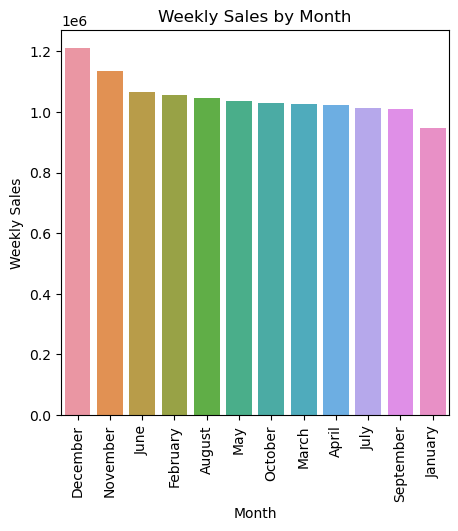

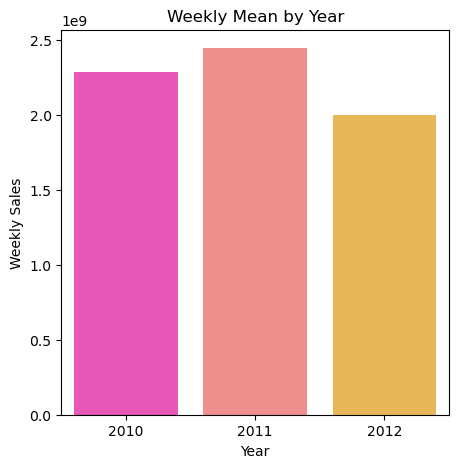

In [23]:
#Visualising the categorical features 
print('\033[1mVisualising Categorical Features:'.center(100))

df['Month Name']=df['Date'].dt.month_name()
monthly_mean=df.groupby('Month Name')['Weekly_Sales'].mean().sort_values(ascending=False)

plt.figure(figsize=(5,5))
sns.barplot(x=monthly_mean.index, y=monthly_mean.values)
plt.title('Weekly Sales by Month')
plt.xlabel('Month')
plt.ylabel('Weekly Sales')
plt.xticks(rotation=90)


yearly_mean=df.groupby('year')['Weekly_Sales'].sum()

plt.figure(figsize=(5,5))
sns.barplot(x=yearly_mean.index, y=yearly_mean.values,palette='spring')
plt.title('Weekly Mean by Year')
plt.xlabel('Year')
plt.ylabel('Weekly Sales')

<font color = "orange"> __: :</br>
The total sales is observed to be comparitively higher in the year 2011. </br>
First quarter__ _[January, February, March, April]_ __has considerably low sales. This could be attributed to low temperatures.</br>
In the second quarter__ _[May, June, July, August]_ __sales seem to rise by a small margin and continue to rise further up in the third quarter__ _[September, October, November, December]._ </br>
__The rise in the third quartercan be explained by holiday season coinciding with this timeframe.__
</font>

In [24]:
x=df[df['Holiday_Flag']==1].month
print(x.unique())
x.value_counts()

[12 10 11  9  7]


12    135
11    135
10     90
9      45
7      45
Name: month, dtype: int64

<font color = "orange"> __: :</br>
This confirms our hypothesis that holiday season overlaps with third quarter of year thereby increasing sales.</br>
July, September,October, November, December are the months with holidays present out of which  November and December have most number of holidays.__
</font>

### V. Target Variable Distribution:

C:\Users\Administrator\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


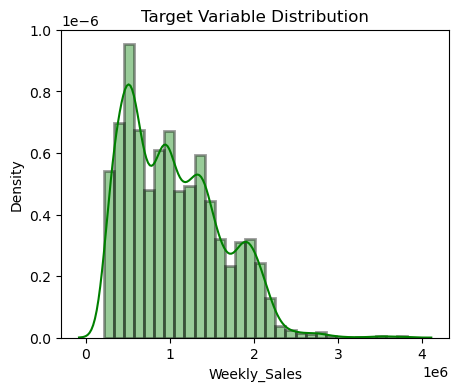

In [25]:
plt.figure(figsize=(5,4))
sns.distplot(df['Weekly_Sales'], color='g',hist_kws=dict(edgecolor="black", linewidth=2), bins=30)
plt.title('Target Variable Distribution')
plt.show()

<font color = "orange"> __: :</br>
The Target Variable is normally distributed.</br>__

## MODEL BUILDING & EVALUATION:

In [26]:
df.head(2)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,weekday,month,year,Month Name
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,6,5,2010,May
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,3,12,2010,December


In [27]:
from sklearn.model_selection import train_test_split

X=df.drop(['Date','Month Name'],axis=1)
y=df['Weekly_Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [29]:
print(np.mean(X_test))
print(np.std(X_test))

0.00041954345506770843
1.0176105395991286


<AxesSubplot:>

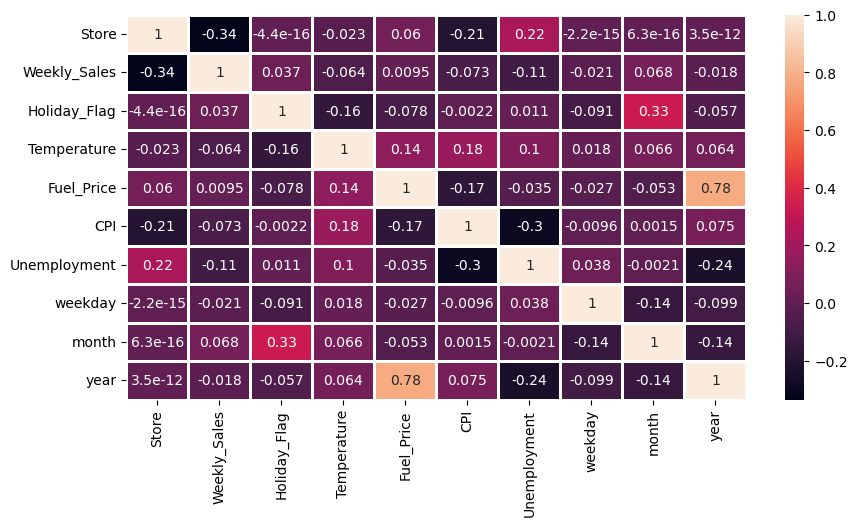

In [30]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True,linewidths=2)

In [31]:
#Multiple Linear Regression
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

lm.fit(X_train,y_train)
y_pred_lm=lm.predict(X_test)

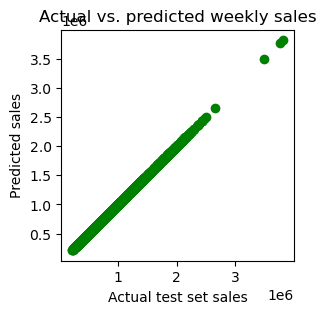

In [32]:
plt.figure(figsize=(3,3))
plt.title("Actual vs. predicted weekly sales")
plt.xlabel("Actual test set sales")
plt.ylabel("Predicted sales")
plt.scatter(x=y_test,y=y_pred_lm,color='green')

In [33]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_lm))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_lm))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_lm)))
print('R Square:', metrics.r2_score(y_test, y_pred_lm))

Mean Absolute Error: 1.1257099301757605e-09
Mean Squared Error: 2.239802575157439e-18
Root Mean Squared Error: 1.4965969982454993e-09
R Square: 1.0


In [34]:
#Random Forest
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=100)

rf.fit(X_train,y_train)
y_pred_rf=rf.predict(X_test)


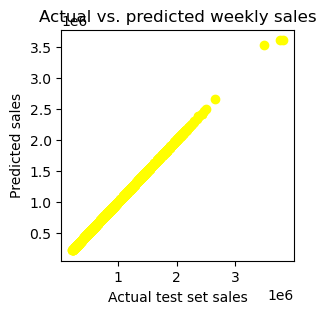

In [35]:
plt.figure(figsize=(3,3))
plt.title("Actual vs. predicted weekly sales")
plt.xlabel("Actual test set sales")
plt.ylabel("Predicted sales")
plt.scatter(x=y_test,y=y_pred_rf,color='yellow')

In [36]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_rf))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_rf))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_rf)))
print('R Square:', metrics.r2_score(y_test, y_pred_rf))

Mean Absolute Error: 682.718026029535
Mean Squared Error: 57658180.32903898
Root Mean Squared Error: 7593.29838272137
R Square: 0.9998210232395912


## TIME SERIES MODELLING:

In [37]:
!pip install prophet

In [38]:
from prophet import Prophet
import numpy as np
import pandas as pd

In [51]:
time_df = df.iloc[:,1:3]
time_df = time_df.rename(columns = {'Date':'ds', 'Weekly_Sales':'y'})
time_df

,ds,y
0,2010-05-02,1643690.90
1,2010-12-02,1641957.44
2,2010-02-19,1611968.17
3,2010-02-26,1409727.59
4,2010-05-03,1554806.68
...,...,...
6430,2012-09-28,713173.95
6431,2012-05-10,733455.07
6432,2012-12-10,734464.36
6433,2012-10-19,718125.53


In [53]:
# Initializing the Prophet model
model = Prophet()
model.fit(time_df)

04:13:32 - cmdstanpy - INFO - Chain [1] start processing
04:13:35 - cmdstanpy - INFO - Chain [1] done processing


In [65]:
pred = model.make_future_dataframe(periods=12, freq='W-MON')
pred

,ds
0,2010-01-10
1,2010-02-04
2,2010-02-07
3,2010-02-19
4,2010-02-26
...,...
150,2013-02-04
151,2013-02-11
152,2013-02-18
153,2013-02-25


In [67]:
forecast = model.predict(pred)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-01-10,1.046156e+06,199922.446860,1.715164e+06,1.046156e+06,1.046156e+06,-98700.640114,-98700.640114,-98700.640114,37083.770938,37083.770938,37083.770938,-135784.411051,-135784.411051,-135784.411051,0.0,0.0,0.0,9.474552e+05
1,2010-02-04,1.046749e+06,314848.678792,1.798389e+06,1.046749e+06,1.046749e+06,22718.333125,22718.333125,22718.333125,-7649.993659,-7649.993659,-7649.993659,30368.326784,30368.326784,30368.326784,0.0,0.0,0.0,1.069468e+06
2,2010-02-07,1.046821e+06,441798.335821,1.815506e+06,1.046821e+06,1.046821e+06,86603.657288,86603.657288,86603.657288,37083.770938,37083.770938,37083.770938,49519.886350,49519.886350,49519.886350,0.0,0.0,0.0,1.133424e+06
3,2010-02-19,1.047106e+06,365603.979591,1.735585e+06,1.047106e+06,1.047106e+06,-11349.267650,-11349.267650,-11349.267650,-10240.029372,-10240.029372,-10240.029372,-1109.238279,-1109.238279,-1109.238279,0.0,0.0,0.0,1.035756e+06
4,2010-02-26,1.047272e+06,311276.470044,1.736375e+06,1.047272e+06,1.047272e+06,-37343.862349,-37343.862349,-37343.862349,-10240.029371,-10240.029371,-10240.029371,-27103.832977,-27103.832977,-27103.832977,0.0,0.0,0.0,1.009928e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,2013-02-04,1.042682e+06,390560.734853,1.818542e+06,1.042498e+06,1.042845e+06,70257.421380,70257.421380,70257.421380,37578.268222,37578.268222,37578.268222,32679.153159,32679.153159,32679.153159,0.0,0.0,0.0,1.112939e+06
151,2013-02-11,1.042234e+06,409513.941786,1.826194e+06,1.042013e+06,1.042439e+06,84886.490031,84886.490031,84886.490031,37578.268222,37578.268222,37578.268222,47308.221809,47308.221809,47308.221809,0.0,0.0,0.0,1.127120e+06
152,2013-02-18,1.041786e+06,373861.841752,1.774403e+06,1.041520e+06,1.042042e+06,41355.306924,41355.306924,41355.306924,37578.268222,37578.268222,37578.268222,3777.038702,3777.038702,3777.038702,0.0,0.0,0.0,1.083141e+06
153,2013-02-25,1.041338e+06,369399.200545,1.800741e+06,1.041022e+06,1.041649e+06,11247.523734,11247.523734,11247.523734,37578.268222,37578.268222,37578.268222,-26330.744488,-26330.744488,-26330.744488,0.0,0.0,0.0,1.052585e+06


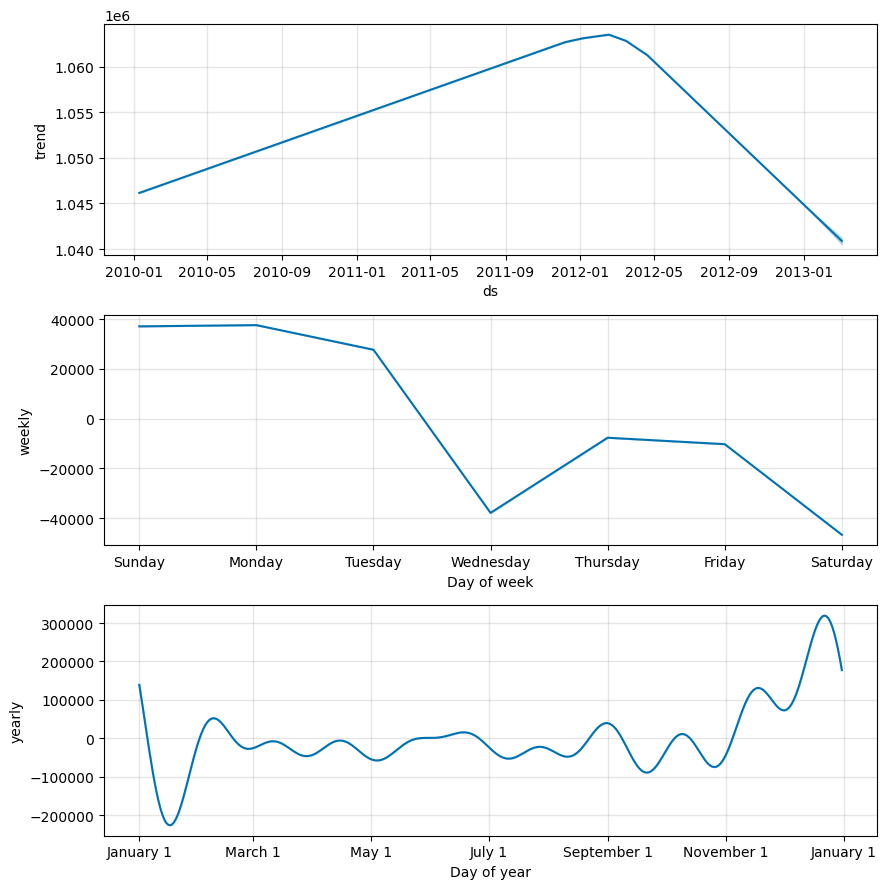

In [79]:
fig1 = model.plot_components(forecast)

In [83]:
from prophet.diagnostics import cross_validation
df_cv = cross_validation(model, initial='600 days', period='90 days', horizon = '180 days')
df_cv.head()

  0%|          | 0/4 [00:00<?, ?it/s]

04:30:46 - cmdstanpy - INFO - Chain [1] start processing
04:30:48 - cmdstanpy - INFO - Chain [1] done processing
04:30:54 - cmdstanpy - INFO - Chain [1] start processing
04:30:56 - cmdstanpy - INFO - Chain [1] done processing
04:31:01 - cmdstanpy - INFO - Chain [1] start processing
04:31:02 - cmdstanpy - INFO - Chain [1] done processing
04:31:07 - cmdstanpy - INFO - Chain [1] start processing
04:31:10 - cmdstanpy - INFO - Chain [1] done processing


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2011-09-23,977494.820502,203990.319051,1.677893e+06,291024.98,2011-09-17
1,2011-09-23,977494.820502,299622.665775,1.721898e+06,1338657.95,2011-09-17
2,2011-09-23,977494.820502,240534.741512,1.682214e+06,1336044.75,2011-09-17
3,2011-09-23,977494.820502,296780.533413,1.683346e+06,876583.98,2011-09-17
4,2011-09-23,977494.820502,245970.289156,1.675909e+06,895535.31,2011-09-17


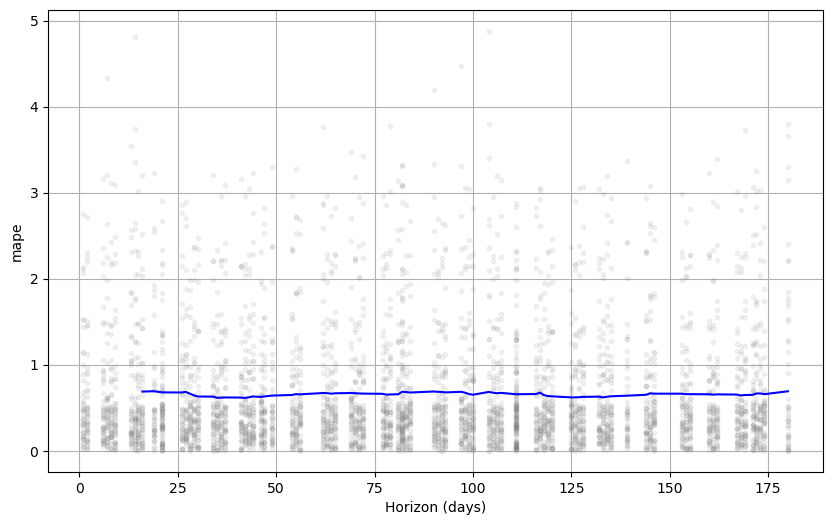

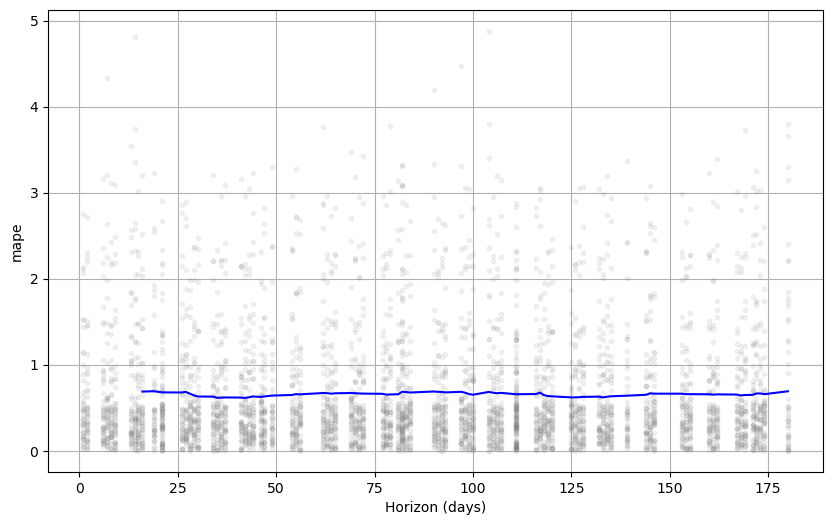

In [89]:
from prophet.plot import plot_cross_validation_metric
plot_cross_validation_metric(df_cv, metric='mape', rolling_window = 0.1)

In [73]:
time_df.tail()

,ds,y
6430,2012-09-28,713173.95
6431,2012-05-10,733455.07
6432,2012-12-10,734464.36
6433,2012-10-19,718125.53
6434,2012-10-26,760281.43


In [77]:
forecast[['ds', 'yhat']].tail(14)

,ds,yhat
141,2012-11-05,1.098620e+06
142,2012-12-10,1.244478e+06
143,2012-12-17,1.366677e+06
144,2012-12-24,1.393487e+06
145,2012-12-31,1.252567e+06
146,2013-01-07,1.023652e+06
147,2013-01-14,8.698691e+05
148,2013-01-21,8.830926e+05
149,2013-01-28,1.007439e+06
150,2013-02-04,1.112939e+06
